In [ ]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,f1_score

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/PallaviReddyV/employeeturnover/main/HR%20Employee%20Turnover%20-%20EmployeeTurnover.tsv.csv')
df.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TurnoverType,TurnoverReason,Location
0,41,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,...,8,0,1,6,4,0,5,Voluntary,Resignation,Dallas
1,49,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,...,10,3,3,10,7,1,7,NaN,NaN,Zurich
2,37,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,...,7,3,3,0,0,0,0,Voluntary,Resignation,Zurich
3,33,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,...,8,3,3,8,7,3,0,NaN,NaN,Tokyo
4,27,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,...,6,3,3,2,2,2,2,NaN,NaN,Dallas


In [ ]:
#EDA

In [ ]:
df.isna().sum()

Age                            0
BusinessTravel                 0
Department                     0
DistanceFromHome               0
Education                      0
EducationField                 0
EmployeeNumber                 0
EnvironmentSatisfaction        0
Gender                         0
JobInvolvement                 0
JobLevel                       0
JobRole                        0
JobSatisfaction                0
MaritalStatus                  0
MonthlyIncome                  0
NumCompaniesWorked             0
OverTime                       0
PercentSalaryHike              0
PerformanceRating              0
RelationshipSatisfaction       0
Status                         0
StockOptionLevel               0
TotalWorkingYears              0
TrainingTimesLastYear          0
WorkLifeBalance                0
YearsAtCompany                 0
YearsInCurrentRole             0
YearsSinceLastPromotion        0
YearsWithCurrManager           0
TurnoverType                1233
TurnoverRe

In [ ]:
print(df.duplicated().value_counts())
df.drop_duplicates(inplace = True)
print(len(df))

False    1470
dtype: int64
1470


In [ ]:
df = df.drop(columns=['TurnoverReason'])

In [ ]:
df.isnull().sum()

Age                            0
BusinessTravel                 0
Department                     0
DistanceFromHome               0
Education                      0
EducationField                 0
EmployeeNumber                 0
EnvironmentSatisfaction        0
Gender                         0
JobInvolvement                 0
JobLevel                       0
JobRole                        0
JobSatisfaction                0
MaritalStatus                  0
MonthlyIncome                  0
NumCompaniesWorked             0
OverTime                       0
PercentSalaryHike              0
PerformanceRating              0
RelationshipSatisfaction       0
Status                         0
StockOptionLevel               0
TotalWorkingYears              0
TrainingTimesLastYear          0
WorkLifeBalance                0
YearsAtCompany                 0
YearsInCurrentRole             0
YearsSinceLastPromotion        0
YearsWithCurrManager           0
TurnoverType                1233
Location  

In [ ]:
#df.loc[df["TurnoverType"] == "Voluntary", "TurnoverType"] = 'Yes'
#df['TurnoverType'].fillna(0)

In [ ]:
df["TurnoverType"].fillna("Involuntary", inplace = True)
df.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TurnoverType,Location
0,41,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,...,0,8,0,1,6,4,0,5,Voluntary,Dallas
1,49,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,...,1,10,3,3,10,7,1,7,Involuntary,Zurich
2,37,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,...,0,7,3,3,0,0,0,0,Voluntary,Zurich
3,33,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,...,0,8,3,3,8,7,3,0,Involuntary,Tokyo
4,27,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,...,1,6,3,3,2,2,2,2,Involuntary,Dallas


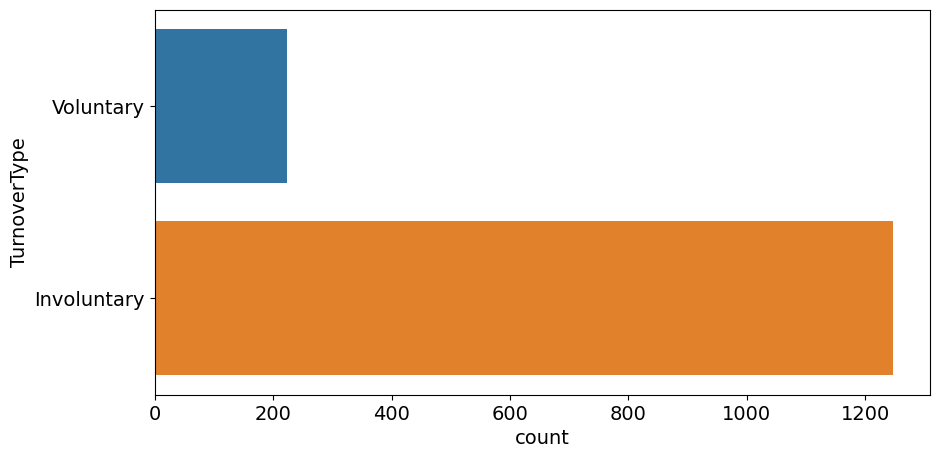

In [ ]:
plt.figure(figsize=(10,5))
plt.rc("font", size=14)
sns.countplot(y='TurnoverType',data=df)
plt.show()

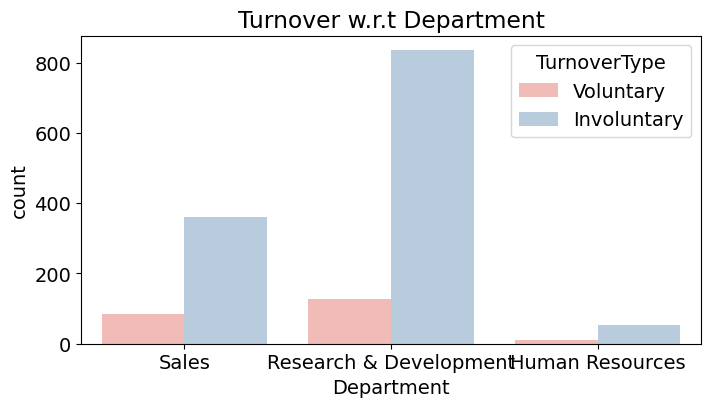

In [ ]:
# Department wrt Turnover
plt.figure(figsize=(8,4))
sns.countplot(x='Department',hue='TurnoverType', data=df, palette='Pastel1')
plt.title("Turnover w.r.t Department")
plt.show()

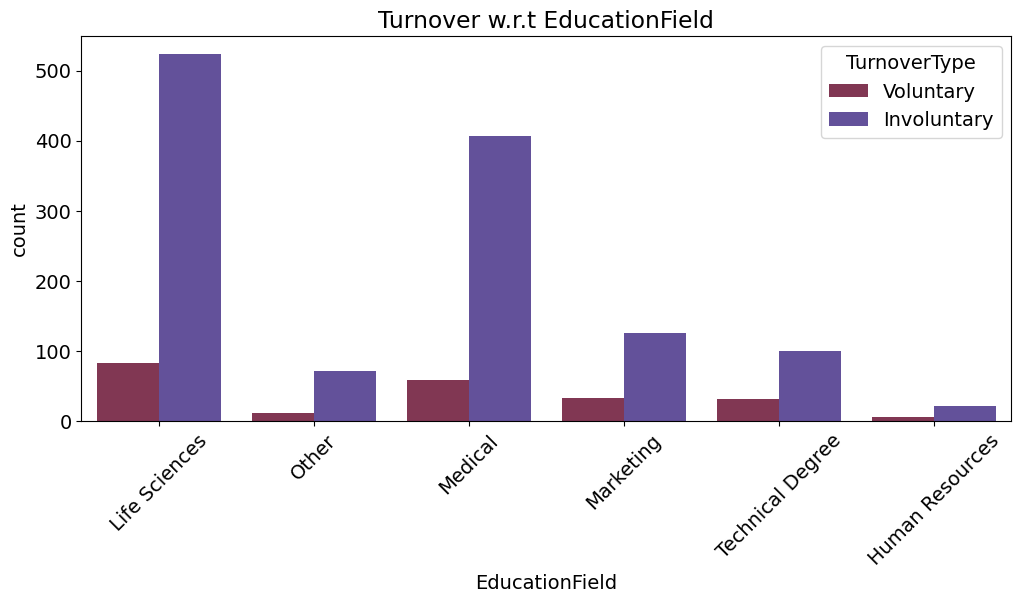

In [ ]:
# Education field w.r.t Turnover
plt.figure(figsize=(12,5))
sns.countplot(x='EducationField',hue='TurnoverType', data=df, palette='twilight_r')
plt.title("Turnover w.r.t EducationField")
plt.xticks(rotation=45)
plt.show()

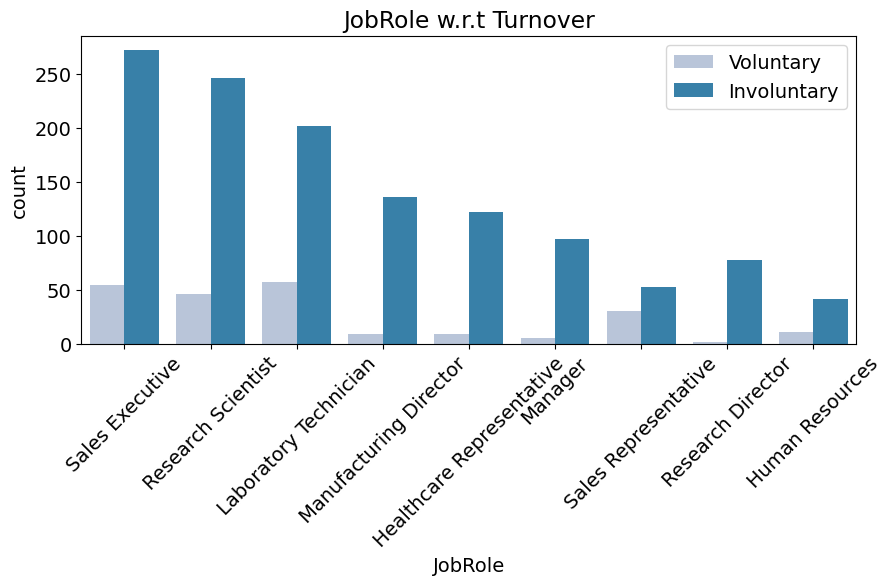

In [ ]:
# At which jobrole most people are leaving the jobs
plt.figure(figsize=(10,4))
sns.countplot(x='JobRole',hue='TurnoverType', data=df, palette='PuBu')
plt.title("JobRole w.r.t Turnover")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

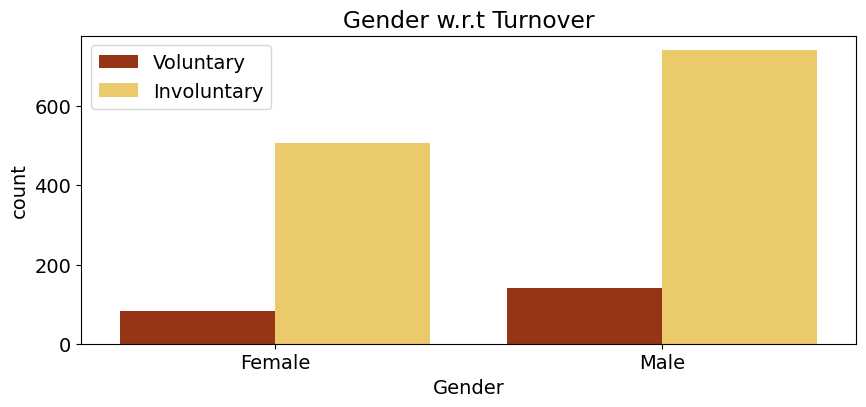

In [ ]:
# male vs female
plt.figure(figsize=(10,4))
sns.countplot(x='Gender',hue='TurnoverType', data=df, palette='afmhot')
plt.title("Gender w.r.t Turnover")
plt.legend(loc='best')
plt.show()

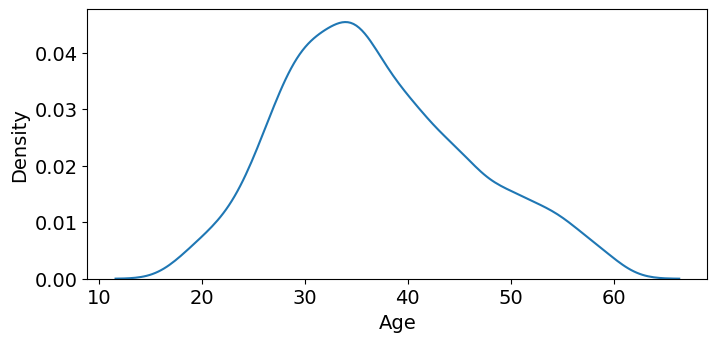

In [ ]:
# distribution of age
plt.figure(figsize=(8,3.5))
sns.distplot(df['Age'],hist=False)
plt.show()

In [ ]:
features = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
                    'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
df[features].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


In [ ]:
df.loc[df["TurnoverType"] == "Voluntary", "TurnoverType"] = 1
df.loc[df["TurnoverType"] == "Involuntary", "TurnoverType"] = 0

In [ ]:
df.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TurnoverType,Location
0,41,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,...,0,8,0,1,6,4,0,5,1,Dallas
1,49,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,...,1,10,3,3,10,7,1,7,0,Zurich
2,37,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,...,0,7,3,3,0,0,0,0,1,Zurich
3,33,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,...,0,8,3,3,8,7,3,0,0,Tokyo
4,27,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,...,1,6,3,3,2,2,2,2,0,Dallas


## LABEL ENCODING

In [ ]:
df['TurnoverType'] = df['TurnoverType'].replace({'No':0,'Yes':1})
df['OverTime'] = df['OverTime'].map({'No':0,'Yes':1})
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoding_cols=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
label_encoders = {}
for column in encoding_cols:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [ ]:
df['TurnoverType'] = df['TurnoverType'].replace({'Yes':1})

In [ ]:
df = df.drop(columns=['Location'])
df = df.drop(columns=['Status'])

In [ ]:
df.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TurnoverType
0,41,2,2,1,2,1,1,2,1,3,...,1,0,8,0,1,6,4,0,5,1
1,49,1,1,8,1,1,2,3,0,2,...,4,1,10,3,3,10,7,1,7,0
2,37,2,1,2,2,4,4,4,0,2,...,2,0,7,3,3,0,0,0,0,1
3,33,1,1,3,4,1,5,4,1,3,...,3,0,8,3,3,8,7,3,0,0
4,27,2,1,2,1,3,7,1,0,3,...,4,1,6,3,3,2,2,2,2,0


## SPLITTING TRAINING AND TESTING DATA

In [ ]:
X = df.drop(['TurnoverType','Gender','BusinessTravel','Department','EducationField'], axis=1)
y = df['TurnoverType'].values

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## RESAMPLING

In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print(Counter(y))
rus = RandomOverSampler(random_state = 42)
X_over,y_over = rus.fit_resample(X,y)
print(Counter(y_over))

Counter({0: 1247, 1: 223})
Counter({1: 1247, 0: 1247})


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1995, 24)
(1995,)
(499, 24)
(499,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   BusinessTravel            1470 non-null   int64
 2   Department                1470 non-null   int64
 3   DistanceFromHome          1470 non-null   int64
 4   Education                 1470 non-null   int64
 5   EducationField            1470 non-null   int64
 6   EmployeeNumber            1470 non-null   int64
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   Gender                    1470 non-null   int64
 9   JobInvolvement            1470 non-null   int64
 10  JobLevel                  1470 non-null   int64
 11  JobRole                   1470 non-null   int64
 12  JobSatisfaction           1470 non-null   int64
 13  MaritalStatus             1470 non-null   int64
 14  MonthlyIncome             1470 non-null 

## LOGISTIC REGRESSION(building Models)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
prediction=logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test,prediction)
print("Accuracy Score -", accuracy_score(y_test , prediction))

Accuracy Score - 0.6733466933867736


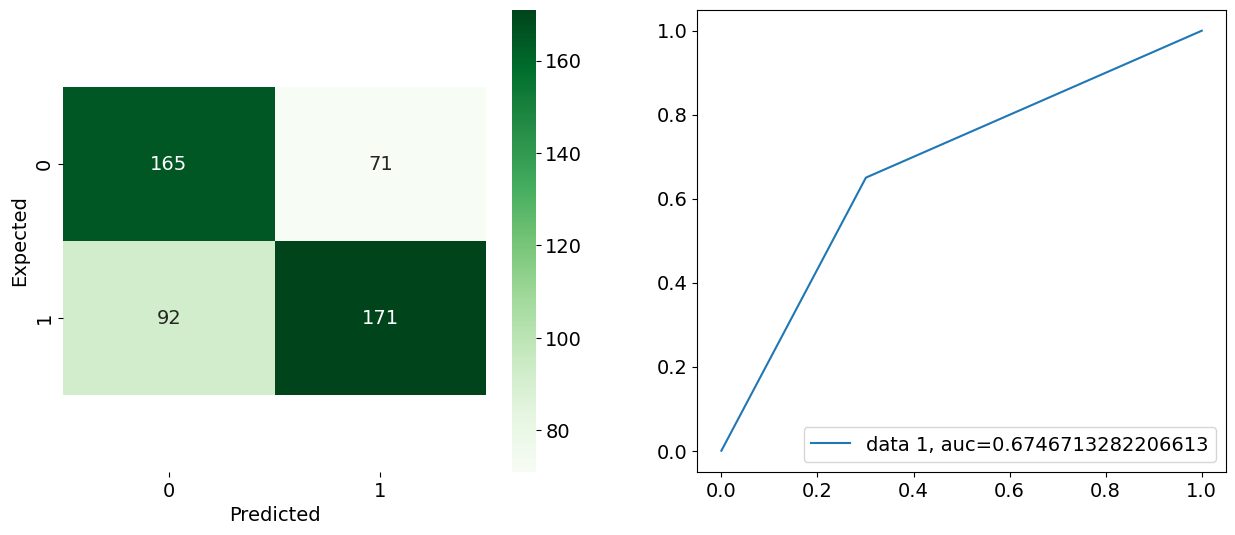

In [ ]:
fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Greens', fmt = 'd')
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted')
plt.ylabel('Expected')

ax2 = fig.add_subplot(1,2,2)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  prediction)
auc = roc_auc_score(y_test, prediction)
ax2 = plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### BUILDING MODELS

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=11)
x_smote, y_smote = smote.fit_resample(X_train, y_train)

In [ ]:
models = {
    LogisticRegression(max_iter=500):'Logistic Regression',
    SVC():"Support Vector Machine",
    RandomForestClassifier():'Random Forest'
}
for m in models.keys():
    m.fit(x_smote,y_smote)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

Accuracy Score for Logistic Regression is :  68.93787575150301 %
Accuracy Score for Support Vector Machine is :  63.52705410821643 %
Accuracy Score for Random Forest is :  97.1943887775551 %


## CLASSIFICATION REPORT

In [ ]:
for model,name in models.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}")
    print("----------------------------------------------------------")
    print(classification_report(y_test,y_pred))
    print("----------------------------------------------------------")

Classification Report for Logistic Regression
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       236
           1       0.72      0.67      0.69       263

    accuracy                           0.69       499
   macro avg       0.69      0.69      0.69       499
weighted avg       0.69      0.69      0.69       499

----------------------------------------------------------
Classification Report for Support Vector Machine
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.75      0.66       236
           1       0.71      0.53      0.60       263

    accuracy                           0.64       499
   macro avg       0.65      0.64      0.63       499
weighted avg       0.65      0.64      0.63       499

----------------------------------------------------------
Classification 

Random forest has given the greater accuracy
